<a href="https://colab.research.google.com/github/X4D0/DataVisualization/blob/main/Assignment4_1301184233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 - Geospatial Data
Rayhan Rahmanda<br>
1301184233<br>
IF-42-GAB03

## Intro
Tugas : Buatlah visualisasi geospatial yang menunjukkan sebaran kasus positif covid19 di Indonesia dengan basis provinsi.


> Pada Tugas kali ini akan digunakan 2 (dua) buah file yaitu Shapefile untuk Provinsi Jawa Barat dan file Dataset yang berisikan data jumlah Covid-19 Tanggal 05 Mei 2021 di tiap Kab/Kota.

## Prepare Data
### Import Library/Package yang dibutuhkan :

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-sbd0z5in
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-sbd0z5in
     |████████████████████████████████| 15.3MB 273kB/s 
     |████████████████████████████████| 6.5MB 43.0MB/s 
  Created wheel for geopandas: filename=geopandas-0.9.0+22.g85e066a-py2.py3-none-any.whl size=995260 sha256=2a17adbff321221ed40f66f85de56749ec76e52bdd6f5332585e3958992775a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-d6q77rvj/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-com

In [2]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

Mounted at /content/drive


### Load Shapefile untuk Provinsi Jawa Barat :

In [3]:
jabar = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Dataset/GeoSpatial Provinsi Jawa Barat/PROVINSI_JAWA_BARAT.shp")
jabar.drop(jabar.tail(1).index,inplace=True)
jabar.drop(jabar.columns.difference(['PROVINSI','KABKOT', 'geometry']), 1, inplace=True)
jabar

,PROVINSI,KABKOT,geometry
0,JAWA BARAT,BOGOR,"POLYGON Z ((106.97083 -6.30274 0.00000, 106.97..."
1,JAWA BARAT,SUKABUMI,"POLYGON Z ((106.74152 -6.71556 0.00000, 106.74..."
2,JAWA BARAT,CIANJUR,"POLYGON Z ((107.23021 -6.60494 0.00000, 107.23..."
3,JAWA BARAT,BANDUNG,"POLYGON Z ((107.73309 -6.81400 0.00000, 107.73..."
4,JAWA BARAT,GARUT,"POLYGON Z ((107.91816 -6.94760 0.00000, 107.91..."
5,JAWA BARAT,TASIKMALAYA,"MULTIPOLYGON Z (((108.35489 -7.35286 0.00000, ..."
6,JAWA BARAT,CIAMIS,"MULTIPOLYGON Z (((108.44145 -7.54613 0.00000, ..."
7,JAWA BARAT,KUNINGAN,"POLYGON Z ((108.42106 -6.78413 0.00000, 108.42..."
8,JAWA BARAT,CIREBON,"MULTIPOLYGON Z (((108.68501 -6.76990 0.00000, ..."
9,JAWA BARAT,MAJALENGKA,"POLYGON Z ((108.12245 -6.54255 0.00000, 108.12..."


### Load Covid Jawa Barat Dataset :

In [4]:
covid_jabar = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/GeoSpatial Provinsi Jawa Barat/COVID_JAWABARAT.csv")
covid_jabar.columns = map(str.upper, covid_jabar.columns)
covid_jabar.drop(covid_jabar.columns.difference(['PROVINSI','KABKOT', 'CONFIRMATION']), 1, inplace=True)
covid_jabar['PROVINSI'] = covid_jabar['PROVINSI'].str.upper()
covid_jabar.head()

,PROVINSI,KABKOT,CONFIRMATION
0,JAWA BARAT,BOGOR,16621
1,JAWA BARAT,SUKABUMI,4819
2,JAWA BARAT,CIANJUR,3375
3,JAWA BARAT,BANDUNG,10247
4,JAWA BARAT,GARUT,9616


### Merge Data :

In [5]:
kopit = jabar.merge(covid_jabar, left_on=['PROVINSI','KABKOT'], right_on=['PROVINSI','KABKOT'])
kopit.head()

,PROVINSI,KABKOT,geometry,CONFIRMATION
0,JAWA BARAT,BOGOR,"POLYGON Z ((106.97083 -6.30274 0.00000, 106.97...",16621
1,JAWA BARAT,SUKABUMI,"POLYGON Z ((106.74152 -6.71556 0.00000, 106.74...",4819
2,JAWA BARAT,CIANJUR,"POLYGON Z ((107.23021 -6.60494 0.00000, 107.23...",3375
3,JAWA BARAT,BANDUNG,"POLYGON Z ((107.73309 -6.81400 0.00000, 107.73...",10247
4,JAWA BARAT,GARUT,"POLYGON Z ((107.91816 -6.94760 0.00000, 107.91...",9616


## Visualize


### GeoPlot Jawa Barat Map :

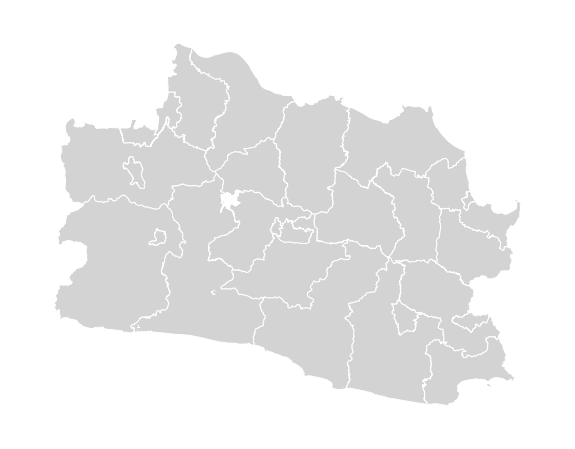

In [6]:
gplt.polyplot(
    kopit, 
    edgecolor="white",
    facecolor="lightgray",
    figsize=(12, 8))

### Choropleth :

Text(0.5, 1.0, 'Angka Positif COVID-19 di Prov. Jawa Barat - 05 Mei 2021')

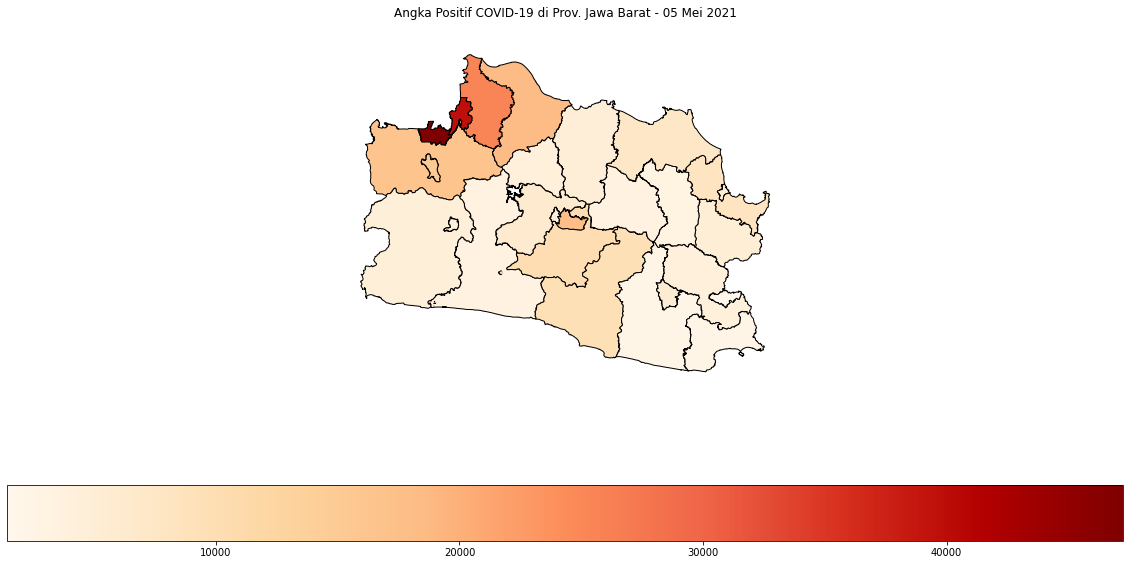

In [13]:
PALETTE = 'OrRd'
gplt.choropleth(kopit, hue = kopit['CONFIRMATION'], cmap = PALETTE, legend=True, legend_kwargs={'orientation': 'horizontal'}, figsize=(20,10))
plt.title("Angka Positif COVID-19 di Prov. Jawa Barat - 05 Mei 2021")

### Create Point on every Kab/Kota : 
**(CRS tidak dapat bekerja di google colab sehingga tidak dapat menambahkan titik pada map)**

In [8]:
# kopit['coords'] = kopit['geometry'].apply(lambda x: x.centroid.coords[:])
# kopit['coords'] = [coords[0] for coords in kopit['coords']]

# titik = kopit[['KABKOT','CONFIRMATION','coords']]
# titik = titik.rename(columns={'coords': 'geometry'})

# titik['geometry'] = 'POINT ' + titik['geometry'].astype(str)

# titik.head()

,KABKOT,CONFIRMATION,geometry
0,BOGOR,16621,"POINT (106.76753084549071, -6.559979467012811)"
1,SUKABUMI,4819,"POINT (106.7076211422049, -7.0762083090673995)"
2,CIANJUR,3375,"POINT (107.15777193917582, -7.133712558309328)"
3,BANDUNG,10247,"POINT (107.61084118112224, -7.09996871100377)"
4,GARUT,9616,"POINT (107.78886265194525, -7.3595863067916385)"


Add Points to the Map :

In [9]:
# ax = gplt.polyplot(
#     kopit, 
#     edgecolor="white",
#     facecolor="lightgray",
#     figsize=(12, 8)
# )

# gplt.pointplot(
#     titik,
#     ax=ax,
#     hue="CONFIRMATION",
#     cmap="Reds",
#     scheme="quantiles",
#     scale="CONFIRMATION",
#     limits=(1, 10),
#     legend=True,
#     legend_var="scale",
#     legend_kwargs={"frameon": False},
#     legend_values=[100, 1000, 5000, 7000, 10000],
#     legend_labels=["100 Orang", "1000 Orang", "5000 Orang", "7000 Orang", "10000 Orang"]
# )

# ax.set_title("Angka Positif COVID-19 di tiap Kab/Kota Provinsi Jawa Barat 05 Mei 2021", fontsize=16)